# Regression Analysis

<br/>

- Regression problem

- Analytical solution

- Regression results

- Application to capital markets

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')
sns.set_context('poster', rc={"lines.linewidth": 2} )

%matplotlib inline

In [254]:
def gen_regression_problem(N=30, Vx=4, Ve=1.5, alpha=1, beta=0.5, mu=0, positive=False ):

    X = np.random.uniform(-Vx + mu, Vx + mu, N )
    E = np.random.normal(0, Ve, N )
    
    Y  = [ alpha + beta*x + e for x,e in zip(X,E) ]
    if positive: Y = np.maximum(Y,0)
        
    df = pd.DataFrame({ 'X':X, 'Y':Y, 'E':E }).sort_values('X')  

    return df

def reg_table(y,x):
    from IPython.core.display import HTML
    from IPython.core.display import display
    reg = sm.OLS(y,x).fit()
    s   = reg.summary2().tables[0].ix[[0,1,3,6]].to_html(index=False, header=False)
    display( HTML(s) )
    display( reg.summary().tables[1] )
    

def plot_reg(df, alpha=None, beta=None, w=[-6,6], h=[-6,6], prt=True, fs=(10,4)):
    
    fig, (ax1) = plt.subplots(1,1, figsize=fs)
            
    _ = ax1.scatter(y=df['Y'], x=df['X'], marker='o', s=50, zorder=2 )
    _ = ax1.set_xlim(w)
    _ = ax1.set_ylim(h)
        
    if beta is not None: 
        
        df['Y1' ] = df['X'].apply( lambda x : alpha + beta * x )
        df['err'] = df['Y'] - df['Y1']
        SS_res    = (df['err']**2).sum()
        if prt:    
            print( 'alpha = {0:1.1f}, beta = {1:1.1f}' .format(alpha, beta) )
            print('Sum of Squared Residuals : {0:1.2f}'.format(SS_res)  )

        plot_fitted_line(alpha, beta, ax1, w)
                
        for i in range(0,len(df)):
            P1 = [ df['X' ].iloc[i], df['X'].iloc[i] ]
            P2 = [ df['Y1'].iloc[i], df['Y'].iloc[i] ]
            ax1.plot(P1, P2, color='cyan', alpha=0.5, zorder=1)

            
def reg_plot_table(df, alpha=None, beta=None):
    if alpha is None: 
        reg = sm.OLS(df['Y'], sm.add_constant(df['X'])).fit()
        alpha = reg.params['const']
        beta  = reg.params['X']
    plot_reg(df, alpha, beta, prt=False)
    reg_table(df['Y'], sm.add_constant(df['X']))

def plot_fitted_line(alpha, beta, ax, w=[-6,6]):
    f   = lambda x : alpha + beta * x
    dom = np.linspace(*w)
    img = list( map( f, dom ) )
    ax.plot(dom, img, color='k', linestyle='--')

def show_dataset():
    df = gen_regression_problem(50, 10, 75, 0, 25, mu=10, positive=True )
    plot_reg(df, w=[0, 20], h=[0,600], fs=(16,8))
    return df
    
def fit_dataset(df, prt=True):
    X1  = sm.add_constant(df[['X']]) 
    reg = sm.OLS( df['Y'], X1 ).fit()
    plot_reg(df, reg.params['const'], reg.params['X'], w=[0, 20], h=[0,600], prt=prt)
    return reg

# Introduction

Imagine you bought a car and the seller told you that it can run for $35$ kilometer per liter of gasoline.

This seems too good to be true, so you decide to investigate the matter.

You start using your new car and every time you drive from a place to another you keep track of

$$ x_i = \text{ liters of gasoline consumed during trip } i $$

$$ y_i = \text{ length in kilometers of trip } i $$

After some months you made $N=50$ trips and you have a dataset with $N$ observations in the form

$$ (x_i, y_i) \quad \text{ for } \quad i=1,\dots N $$

How can you use this data to check if you can *actually* drive for $35$ km with one liter of gasoline?

## Use linear regression!

It makes sense to conjecture a linear relation between liters and kilometers

Hence you assume a linear model of the form

$$ y_i = \alpha + \beta x_i + \varepsilon_i $$

Of course, you expect $\alpha = 0$ and $\beta>0$ (why?)

But the precise value of $\beta$ is an *empirical question*. 

Will it be close to $35$, as promised, or not?

This is how your dataset looks like on your notebook:

![Notebook](Notebook.png "Notebook")

You can also plot it on the (x,y) plane:

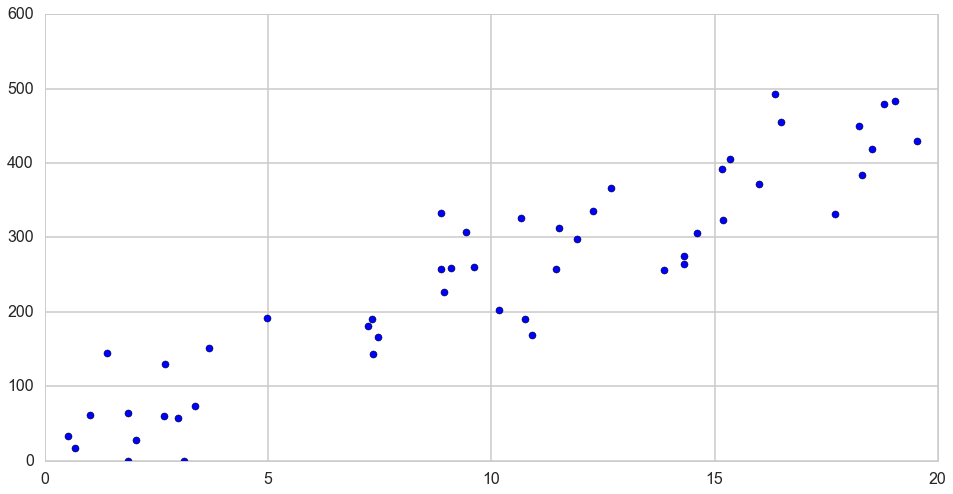

In [213]:
car_data = show_dataset()

You fit a linear regression to estimate the coefficients

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,23.2423,14.999,1.550,0.128,-6.914 53.399
X,22.2526,1.295,17.187,0.000,19.649 24.856


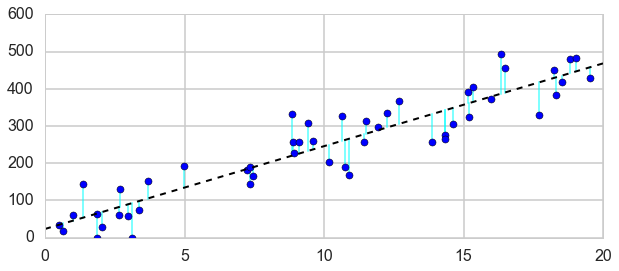

In [255]:
reg = fit_dataset(car_data, prt=False); reg.summary().tables[1]

According to the estimate, the car runs for less than 25 km per liter of gasoline.
The seller was lying!

<br/><br/><br/><br/>

# Regression Problem

We are given $N$ points $(x_i, y_i)$ with $i=1,\dots N$.

We can think of those as sample draws from the the joint distribution of two random variables $X$ and $Y$.

We want to check if there is a linear relation between $X$ and $Y$.

If that is the case, we should find a non-zero $\beta$ when estimating the linear model

$$ y_i = \alpha + \beta x_i + \varepsilon_i $$

# Geometric Interpretation

We can scatter-plot the datapoints on the (x,y) plane

![Regression Problem](problem.png "Regression Problem")

We want the line that fits the points in the best possible way.

Then the **slope** of the line will be the estimated $\beta$, while its **intercept** will be the estimated $\alpha$.

The best fitting line is the one that is closer to most of the points.
![Fitted Line](fitted.png "Fitted Line")

More precisely, it is the line with intercept $\alpha$ and slope $\beta$ which minimizes the **sum of squared residuals**

$$ SS_{res} = \sum_{i=1}^N \varepsilon_i^2 =  \sum_{i=1}^N ( y_i - \alpha - \beta x_i )^2 $$

<br/><br/><br/><br/>

# Example

<br/>

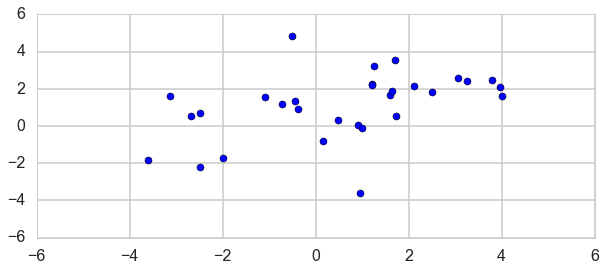

In [281]:
df  = gen_regression_problem(); plot_reg(df)

# First guess

In [284]:
alpha = 2.5
beta  = -0.5

alpha = 2.5, beta = -0.5
Sum of Squared Residuals : 214.54


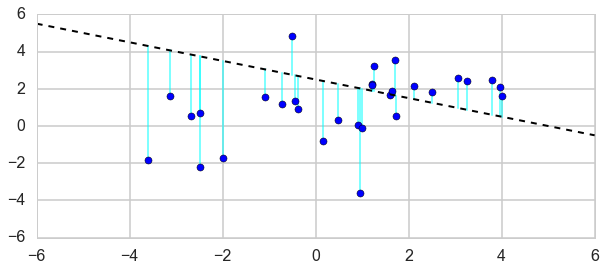

In [285]:
plot_reg(df, alpha, beta)

Not good at all! The slope of the line $\beta$ should be positive

# Second guess

In [287]:
alpha = 2.5
beta  = 0.8

alpha = 2.5, beta = 0.8
Sum of Squared Residuals : 202.30


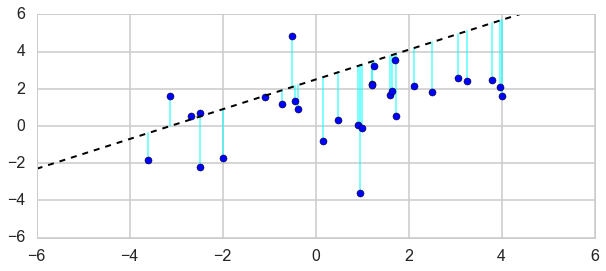

In [288]:
plot_reg(df, alpha, beta)

Better, but the $\alpha$ is too high

# Third guess

In [289]:
alpha =  1
beta  =  0.8

alpha = 1.0, beta = 0.8
Sum of Squared Residuals : 104.19


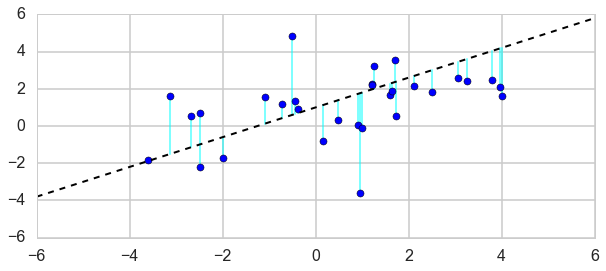

In [290]:
plot_reg(df, alpha, beta)

Not bad! But can we do better?

<br/><br/><br/><br/>

# Analytical Solution

We want to minimize the sum of squared resuduals, $SS_{res}$ , as a funcion of $\alpha$ and $\beta$. How?

#### Let's take derivatives!

First, we impose the FOC with respect to $\alpha$ and we get

$$ 
0 = \frac{\partial}{\partial \alpha}SS_{res} 
\implies 
\alpha = \frac{1}{N} \sum_{i=1}^N y_i - \frac{\beta}{N} \sum_{i=1}^N x_i 
= \bar{y} - \beta \bar{x}
$$

Thus we can re-write $SS_{res}$ as 

$$ SS_{res} = \sum_{i=1}^N \left( y_i - \bar{y} - \beta (x_i-\bar{x}) \right)^2 $$

and imposing the FOC wrt $\beta$ we find

$$ 
\beta = \frac{ \frac{1}{N} \sum_i (y_i - \bar{y})(x_i -\bar{x}) } { \frac{1}{N} \sum_i (x_i -\bar{x})^2 }
= \frac{ \hat{Cov}(X,Y) } { \hat{V}(X) }
$$

Hence we see that the optimal $\beta$ is the sample covariance of $X$ and $Y$ divided by the sample variance of the explanatory variable $X$.

### Optimal $\alpha$ and $\beta$

alpha = 1.0, beta = 0.6
Sum of Squared Residuals : 81.68


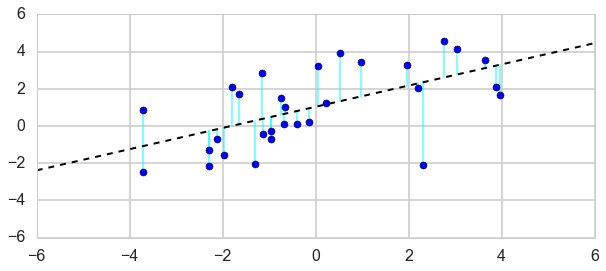

In [278]:
X1    = sm.add_constant(df[['X']])  # Define the explanatory variable
reg   = sm.OLS( df['Y'], X1 ).fit() # Fit the regression
alpha = reg.params['const']         # Estimated alpha
beta  = reg.params['X']             # Estimated beta
plot_reg(df, alpha, beta)

<br/><br/><br/><br/>

# $R^2$

The $R^2$ or **coefficient of determination** is the proportion of the variance of $Y$ that is predictable from $X$.

In other words it measures how well $X$ can explain $Y$.

To define the $R^2$ we first need to introduce two objects:

1. The total sum of squares $SS_{tot}$
<br/><br/>
2. The regression sum of squares $SS_{reg}$

# Total Sum of Squares

The total sum of squares $SS_{tot}$ is proportional to the sample variance of $Y$

$$ SS_{tot} = \frac{1}{N-1} \sum_{i=1}^N (y_i - \bar{y})^2 = \hat{V}(Y) $$ 

This is the variation we would like to explain using the explanatory variable $X$.

# Regression Sum of Squares

<br/>
The *regression sum of squares* or *explained sum of squares* $SS_{tot}$ is proportional to the sample variance of $\beta X$

$$ SS_{reg} = \frac{1}{N-1} \sum_{i=1}^N (\beta x_i - \beta \bar{x})^2 = \hat{V}(\beta X) $$

This is the variation we can explain using the explanatory variable $X$.

# $R^2$ Definition

<br/>
The coefficient of determination or $R^2$ is defined as 

$$ R^2 = \frac{SS_{reg}}{SS_{tot}} $$

It measures the fraction of variance that can be explained by $X$

### Example : Low $R^2$

Model:,OLS,Adj. R-squared:,0.202
Dependent Variable:,Y,AIC:,504.1063
No. Observations:,100,Log-Likelihood:,-250.05
R-squared:,0.210,Scale:,8.8763


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.6221,0.298,2.085,0.040,0.030 1.214
X,0.6493,0.127,5.101,0.000,0.397 0.902


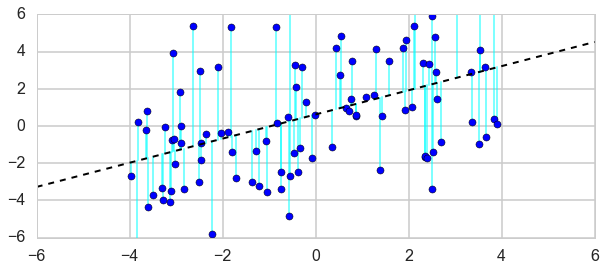

In [279]:
df = gen_regression_problem(100, 4, 3, 0.2, 0.5 ); reg_plot_table(df)

### Example :  High $R^2$

Model:,OLS,Adj. R-squared:,0.854
Dependent Variable:,Y,AIC:,145.2269
No. Observations:,100,Log-Likelihood:,-70.613
R-squared:,0.856,Scale:,0.24527


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.2722,0.050,5.464,0.000,0.173 0.371
X,0.5162,0.021,24.090,0.000,0.474 0.559


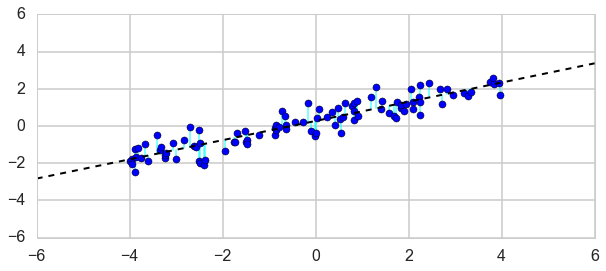

In [280]:
df = gen_regression_problem(100, 4, 0.5, 0.2, 0.5 ); reg_plot_table(df)

# Significance of $\beta$

When we estimate a model on the data, we want to measure the statistical significance of the estimated parameters.

To asses the significance of the estimated $\beta$, for instance, we first need to compute the *volatility* of the estimated parameter.

Then we compare the magnitude of the estimated $\beta$ with its volatility.

If $\beta$ is large enough wrt its volatility, we conclude that it is **significantly** different from zero.

# Standard Error
The *standard error* of $\beta$ is the volatility of the estimated $\beta$, given $X$. 

Since $V(y_i \mid X) = V(\alpha + \beta x_i + \varepsilon_i \mid X) =  V(\varepsilon)$,

$$ V(\beta \mid X) 
= V\left( \frac{ \sum_i (y_i - \bar{y})(x_i -\bar{x}) } { \sum_i (x_i -\bar{x})^2 } \mid X \right)
= \frac{ V(\varepsilon) } { \sum_i (x_i -\bar{x})^2 }
$$

$$
= \frac{1}{(N-1)} \frac{ V(\varepsilon) } { \hat{V}(X) }
$$

Therefore an empirical estimate of the standard error of $\beta$ is

$$ SE(\beta) = \sqrt{ \frac{\hat{V}(\varepsilon)}{ (N-1) \hat{V}(X)} } $$

The intuition is the following:

- The standard error of $\beta$ is the ratio between the sample volatility of $\varepsilon$ and the sample volatility of $X$
- When this ratio is large, it means that *points are stacked together* (see example later)
- Thus, if the $SE(\beta)$ is too large, our estimate of $\beta$ is *unstable*

# t-statistics

The *t-statistics* is defined as the ratio

$$ \frac{\beta}{SE(\beta)} $$ 

If the t-stat is far enough from zero, then we say that the estimated $\beta$ is significantly different from zero.

The threshold for significance depends on the number of explanatory variables in our linear model.

# p-value

A more practical way to check if an estimated coefficient is significantly different from zero is to look at the p-value.

It is computed from the t-stat and it (roughly) gives the probability that the estimated coefficient is non-zero even if the real coefficient is zero (false positive).

The thresholds are fixed by convention as:
- p-value $\geq 5  \% \quad \implies \quad $ not significant
- p-value $ <   5  \% \quad \implies \quad $ weakly significant
- p-value $ <   1  \% \quad \implies \quad $ significant
- p-value $ <   0.1\% \,\,  \implies \quad $ highly significant

<br/><br/><br/><br/>

##  Example :  Highly Significant $\beta$

Model:,OLS,Adj. R-squared:,0.564
Dependent Variable:,Y,AIC:,422.1055
No. Observations:,150,Log-Likelihood:,-209.05
R-squared:,0.567,Scale:,0.96360


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.3161,0.081,3.896,0.000,0.156 0.476
X,0.4947,0.036,13.928,0.000,0.424 0.565


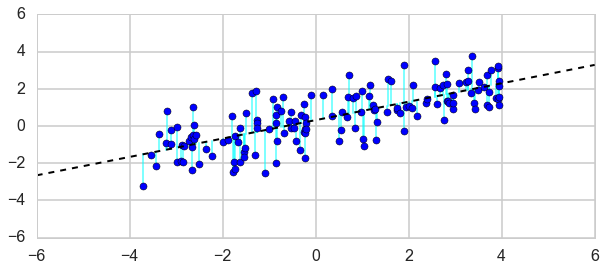

In [291]:
df  = gen_regression_problem(150, 4, 1, 0.2, 0.5 ); reg_plot_table(df)

##  Example :  Not Significant $\beta$

Model:,OLS,Adj. R-squared:,-0.020
Dependent Variable:,Y,AIC:,212.0924
No. Observations:,50,Log-Likelihood:,-104.05
R-squared:,0.001,Scale:,3.9149


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.0074,0.282,0.026,0.979,-0.559 0.574
X,0.3385,1.521,0.223,0.825,-2.719 3.396


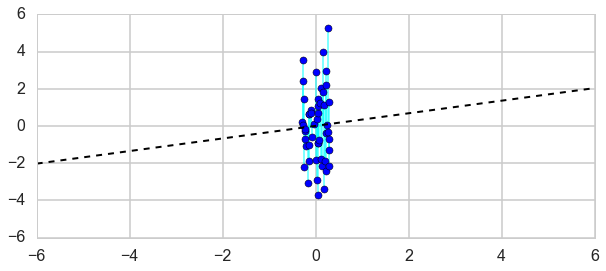

In [292]:
df  = gen_regression_problem(50, 0.3, 2, 0.2, 0.5 ); reg_plot_table(df)

<br/><br/><br/><br/>

# Capital Markets

In [320]:
data = pd.read_csv('CRSP.csv',
                   parse_dates=['date'], 
                   infer_datetime_format=True,
                   na_values='C'
                  )
data.columns = list( map( lambda x : x.lower(), data.columns) )
data.rename_axis({'comnam':'asset', 'sprtrn':'market'}, inplace=1, axis=1)
data = data.set_index('date')
data = data[ ~ data['permno'].isin([93436, 92602, 51131])]

class Stock:
    def __init__( self, permno, color, data=data ):
        self.permno = permno
        self.color  = color
        self.mask   = (data['permno']==permno)
        self.name   = data[self.mask]['asset'].iloc[0]
        

CocaCola     = Stock( 11308, sns.xkcd_rgb['red']  )
Apple        = Stock( 14593, sns.xkcd_rgb['denim blue'] )
Google       = Stock( 90319, sns.xkcd_rgb['teal'] )
Microsoft    = Stock( 10107, sns.xkcd_rgb['teal'] )
Amazon       = Stock( 84788, sns.xkcd_rgb['teal'] )
#Sony         = Stock( 51131, sns.xkcd_rgb['teal'] )

def CAPM_reg(stock, period=None):
    df = data[stock.mask].dropna()
    if period is not None: 
        df = df[df.index.isin(period)]
    y  = df['ret'] 
    x  = sm.add_constant(df['market'] )
    return reg_table(y,x)

pd.set_option('display.float_format', lambda x:'%1.4f'%x)

We have daily return data on a bunch of stocks

In [332]:
data.groupby(['permno']).head(3)

,permno,asset,prc,vol,ret,shrout,market
date,,,,,,,
2007-01-03,10107,MICROSOFT CORP,29.8600,77630458,0.0000,9777000,-0.0012
2007-01-04,10107,MICROSOFT CORP,29.8100,46650955,-0.0017,9777000,0.0012
2007-01-05,10107,MICROSOFT CORP,29.6400,44681937,-0.0057,9777000,-0.0061
2007-01-03,11308,COCA COLA CO,48.5800,7877300,0.0068,2343796,-0.0012
2007-01-04,11308,COCA COLA CO,48.6000,5908400,0.0004,2343796,0.0012
2007-01-05,11308,COCA COLA CO,48.2600,5803900,-0.0070,2343796,-0.0061
2007-01-03,14593,APPLE COMPUTER INC,83.8000,44545733,-0.0123,860220,-0.0012
2007-01-04,14593,APPLE COMPUTER INC,85.6600,34097551,0.0222,860220,0.0012
2007-01-05,14593,APPLE COMPUTER INC,85.0500,29842335,-0.0071,860220,-0.0061


# Market Model

To estimate the market $\beta^i$ of company $i$, we regress its returns on the market returns

$$ R^{i}_{t} = \alpha^i + \beta^{i} R^{M}_t + \varepsilon^i_t $$

Notice that here $i$ identifies the company (so it is fixed), while the sample points are indexed by $t$

The higher the estimated $\beta^i$, the more company $i$ is exposed to the market risk factor

For example, let's estimate the $\beta$ of Coca-Cola

In [318]:
CAPM_reg(CocaCola)

Model:,OLS,Adj. R-squared:,0.403
Dependent Variable:,ret,AIC:,-14719.1211
No. Observations:,2266,Log-Likelihood:,7361.6
R-squared:,0.403,Scale:,8.8333e-05


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.0003,0.000,1.524,0.128,-8.63e-05 0.001
market,0.5675,0.015,39.133,0.000,0.539 0.596


- The estimated $\beta$ is $0.57$ and highly significant
- The estimated $\alpha$ is not significantly different from zero
- The $R^2$ is about $40\%$

Now let's try with Amazon

In [322]:
CAPM_reg(Amazon)

Model:,OLS,Adj. R-squared:,0.318
Dependent Variable:,ret,AIC:,-10836.9389
No. Observations:,2266,Log-Likelihood:,5420.5
R-squared:,0.318,Scale:,0.00048997


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.0013,0.000,2.844,0.004,0.000 0.002
market,1.1092,0.034,32.480,0.000,1.042 1.176


- The beta is higher, larger than one
- The alpha is positive and highly significant

<br/><br/><br/><br/>

# Neutralize the market risk

Amazon has a significant alpha over the sample.

Imagine we invested in research and we were able to predict it.

Can we pocket the alpha, without being exposed to the market risk?

We can form a portfolio which is long Amazon and short the market in the right proportions

Use the fact that the market beta of Amazon is $1.11$

In [327]:
def form_portfolio(stock, factor, w_1, w_2):
    pf_return    = w_1 * data[stock.mask]['ret']
    pf_return   += w_2 * data.groupby(level=0).first()[factor]

    pf = pd.DataFrame( {'ret':pf_return} )
    pf[factor] = data.groupby(level=0).first()[factor]
    return pf

# Arbitrage Portfolio

In [333]:
mu_A = 1;  mu_M = -1.11
pf = form_portfolio(Amazon, 'market', mu_A, mu_M)

In [334]:
reg_table( pf['ret'], sm.add_constant(pf['market']) )

Model:,OLS,Adj. R-squared:,-0.000
Dependent Variable:,ret,AIC:,-10836.9389
No. Observations:,2266,Log-Likelihood:,5420.5
R-squared:,0.000,Scale:,0.00048997


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.0013,0.000,2.844,0.004,0.000 0.002
market,-0.0008,0.034,-0.022,0.982,-0.068 0.066


The alpha is positive and significant, while the market beta is not significantly different from zero.

With this strategy we are able to pocket the alpha, without being exposed to the market risk.

## More realistic : estimate market beta ex-ante
Suppose we want to implement the strategy starting from 2009.

We estimate the market beta in a backward-looking window, say during the previous quarter.

In [337]:
est_win = pd.date_range( pd.datetime(2008,10,1), pd.datetime(2008,12,31) )
inv_win = pd.date_range( pd.datetime(2009,1 ,1), pd.datetime(2015,12,31) )

In [338]:
reg = CAPM_reg(Amazon, est_win)

Model:,OLS,Adj. R-squared:,0.657
Dependent Variable:,ret,AIC:,-251.8932
No. Observations:,64,Log-Likelihood:,127.95
R-squared:,0.663,Scale:,0.0011088


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,-0.0005,0.004,-0.115,0.909,-0.009 0.008
market,1.0891,0.099,11.034,0.000,0.892 1.286


# Realistic Arbitrage Portfolio

In [335]:
mu_A = 1;  mu_M = -1.0891
pf = form_portfolio(Amazon, 'market', mu_A, mu_M)

In [336]:
reg_table( pf['ret'], sm.add_constant(pf['market']) )

Model:,OLS,Adj. R-squared:,-0.000
Dependent Variable:,ret,AIC:,-10836.9389
No. Observations:,2266,Log-Likelihood:,5420.5
R-squared:,0.000,Scale:,0.00048997


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,0.0013,0.000,2.844,0.004,0.000 0.002
market,0.0201,0.034,0.590,0.555,-0.047 0.087


Great! We still get the alpha and the market exposure is not significant.

<br/><br/><br/><br/>

In [340]:
from sklearn import datasets
boston = datasets.load_boston()

bost = pd.DataFrame(boston.data, columns=boston.feature_names)
bost['price'] = boston.target
#boston.DESCR
bost_x = sm.add_constant(bost[['RM','CRIM', 'AGE', 'INDUS']])

## Multivariate Regression :  Boston house prices

In [341]:
reg_table(bost['price'],bost_x)

Model:,OLS,Adj. R-squared:,0.567
Dependent Variable:,price,AIC:,3263.4529
No. Observations:,506,Log-Likelihood:,-1626.7
R-squared:,0.570,Scale:,36.664


,coef,std err,t,P>|t|,[95.0% Conf. Int.]
const,-21.0523,2.887,-7.292,0.000,-26.725 -15.380
RM,7.6751,0.418,18.359,0.000,6.854 8.496
CRIM,-0.1860,0.035,-5.365,0.000,-0.254 -0.118
AGE,-0.0317,0.013,-2.506,0.013,-0.056 -0.007
INDUS,-0.1626,0.056,-2.929,0.004,-0.272 -0.054


<br/><br/><br/><br/>